# Training Convergence Plots for Learning Punctuation

In [21]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'
import pickle
import os
print(os.getcwd())
import time
import gc
import torch
import bisect

from conv_plots_funcs import train_conv_plots

#import empirical cdf
# import sys
# sys.path.append(os.path.abspath('../../src'))

from data_processing import gen_ckpt_steps, move_dict_to_device, get_other_err, get_mop_ratios_ckpt, compute_ratio
# sys.path.append(os.path.abspath('..'))

from check_ecdf import get_empirical_cdf

/home/sultand/TFs_do_KF_ICL/src


In [26]:
valA = "ortho"
valC = "_ident_C"
state_dim = 5
ckpt_step = 8
batch_size = 512 #512 #4096
gpus=1
num_val_sys = 25
experiment = "250125_204545.a2cee4_multi_sys_trace_ortho_state_dim_5_ident_C_lr_1.3207437987531975e-05_num_train_sys_40000" # experiment to load
datasource = "val"
nope = True


compute_more_ckpts = True

/home/sultand/TFs_do_KF_ICL/outputs/train_conv/training_dist_comparison_val_ortho_state_dim_5_val_sys_25_1738039576.655598.pdf
quantiles 5 path exists?: True
ckpt_steps: [3000, 6000, 9000, 12000, 15000, 18000, 21000, 24000, 27000, 30000, 33000, 36000, 39000, 42000, 45000, 48000, 51000, 54000, 57000, 60000, 63000, 66000, 69000, 72000, 75000, 78000, 81000, 84000, 87000, 90000, 93000, 96000, 99000, 102000, 105000, 108000, 111000, 114000, 117000, 120000, 123000, 126000, 129000, 132000, 135000, 138000, 141000]


i 0
/home/sultand/TFs_do_KF_ICL/outputs/GPT2_NoPE/250124_190131.5710d5_multi_sys_trace_ortho_state_dim_5_ident_C_lr_1.584893192461114e-05_num_train_sys_40000/prediction_errors_ident_C_step=3000.ckpt/single_system_ortho_state_dim_5_err_lss.pkl
Loaded Transformer Errors
err shape: torch.Size([1, 2000, 251])
ratios shape: torch.Size([1, 2000, 251])
ratios shape after median: torch.Size([2000, 251])
quantile shape before seg start choice: torch.Size([3, 251])
seg_starts_per_config: [[1,

findfont: Font family 'Times New Roman' not found.


quantile shape before seg start choice: torch.Size([3, 251])
seg_starts_per_config: [[1, 126]]
seg_starts_per_config: [[1, 126]]
seg_starts[1] + 1: 127
quantile shape after seg start choice: torch.Size([3])
quantile shape: torch.Size([3])
path does not exist: ../outputs/GPT2_NoPE/250124_190131.5710d5_multi_sys_trace_ortho_state_dim_5_ident_C_lr_1.584893192461114e-05_num_train_sys_40000/prediction_errors_ident_C_step=141000.ckpt/single_system_ortho_state_dim_5_err_lss.pkl
quantiles shape (46, 3)
no title for single system


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

(array([0.41621855, 0.7357179 , 1.1582136 ], dtype=float32),
 [3072000,
  6144000,
  9216000,
  12288000,
  15360000,
  18432000,
  21504000,
  24576000,
  27648000,
  30720000,
  33792000,
  36864000,
  39936000,
  43008000,
  46080000,
  49152000,
  52224000,
  55296000,
  58368000,
  61440000,
  64512000,
  67584000,
  70656000,
  73728000,
  76800000,
  79872000,
  82944000,
  86016000,
  89088000,
  92160000,
  95232000,
  98304000,
  101376000,
  104448000,
  107520000,
  110592000,
  113664000,
  116736000,
  119808000,
  122880000,
  125952000,
  129024000,
  132096000,
  135168000,
  138240000,
  141312000])

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

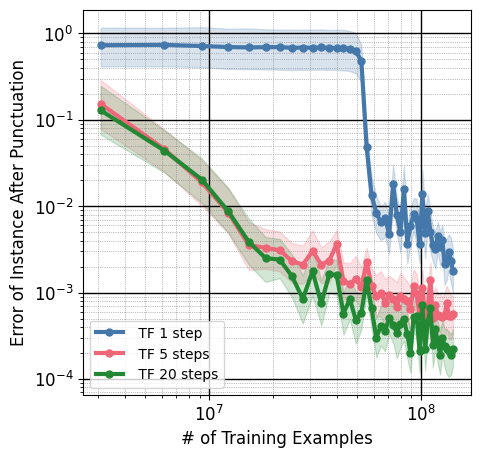

In [27]:
kal_ckpt = 40650 #60000 #81000 #28500
train_conv_plots([experiment], ["Identity"], [kal_ckpt], valA, valC, num_val_sys, compute_more_ckpts, None, 3000, 141000, 3000, state_dim, single_system=True, nope=nope, batch_size=batch_size, gpus=gpus)